# Сравнение методов восстановления параметров зашумленной системы

## Загрузка методов

Были рассмотрены 3 метода:
1. Решения системы напрямую, основываясь на отклике системы на $u$ в виде аппроксимации $\delta$-импульса
2. Решения системы комбинаторным методом, основываясь на отклике системы при гармоническом $u$
3. Решения системы эвристическим подходом, основанным на методе Тихонова, подавая на вход периодический ступенчатый сигнал

In [1]:
%run runner.py

## Установки отрисовки

In [2]:
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [3]:
errors = [norm_error, uniform_error, two_peaks_error]

## Сравнение

### Параметры для сравнения

Для сравнения эффективности методов были использованы следующие параметры:
1. Процент покрытия промежутка $[0, T]$ найденной аппроксимацией $h$.
2. Процент попадания в полученные доверительные интервалы.
3. Характеристика $R^2$ консистентности регресии для оценки насколько хорошо середина интервалов аппроксимирует реальное значение $h$.
4. Мера точности приближения STD, которая определяется как среднее квадратическое по размерам доверительных интервалов.
5. Среднее время вычислений.

### Сравнение при слабом дроблении

Для начала сравним методы в случае слабого дробления, к примеру возьмем $\delta = 2.5$ при $T = 20$.

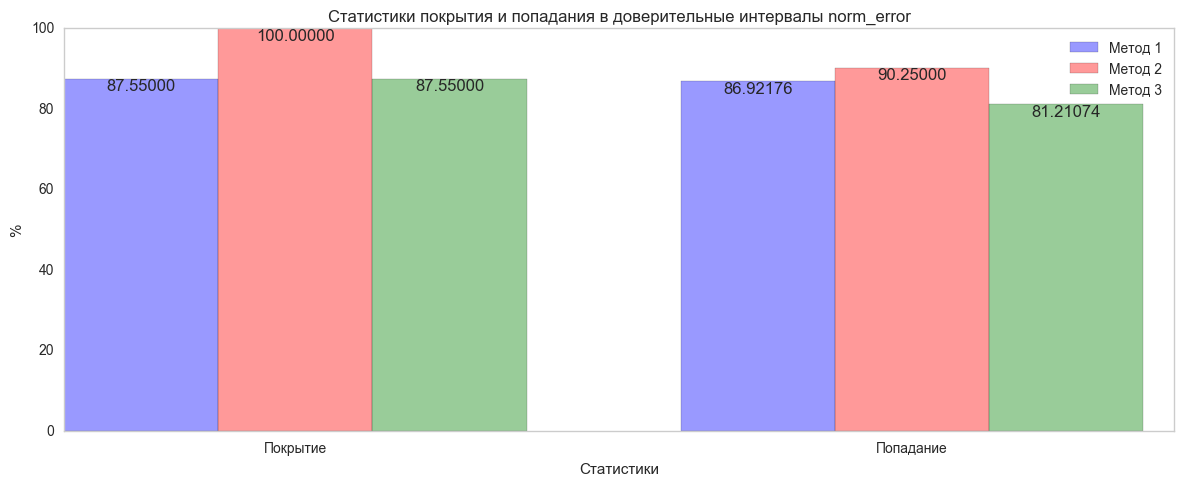

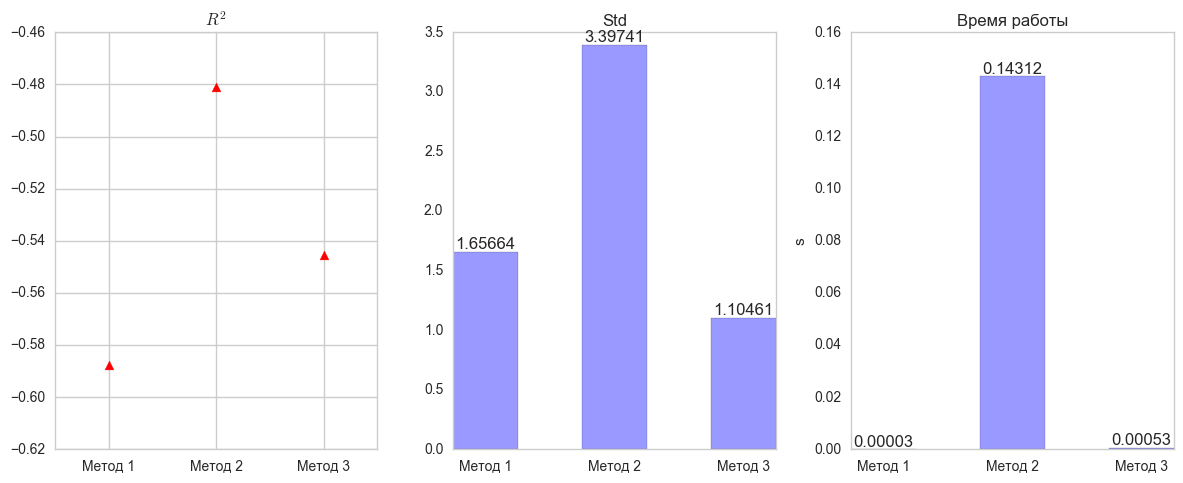

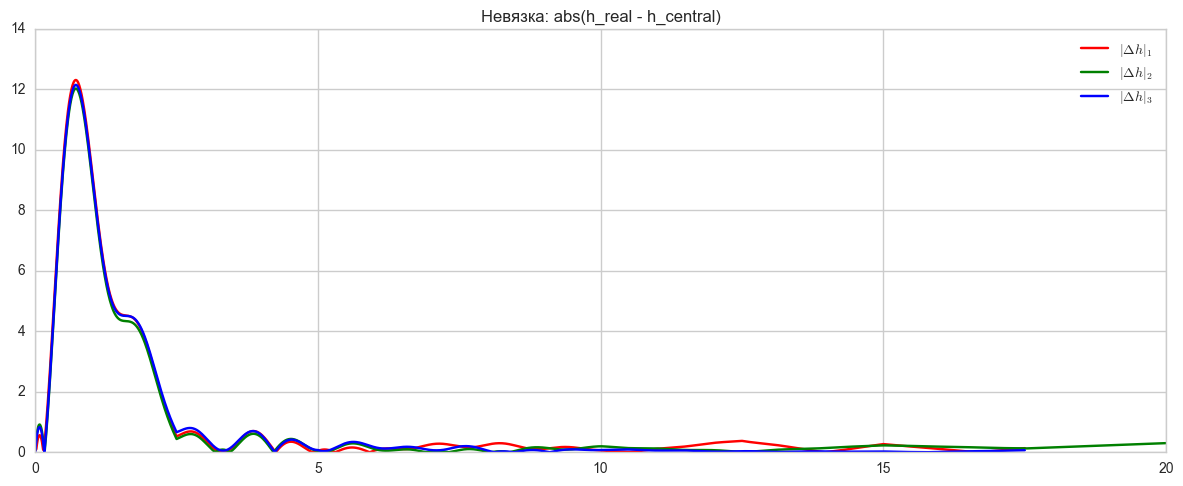

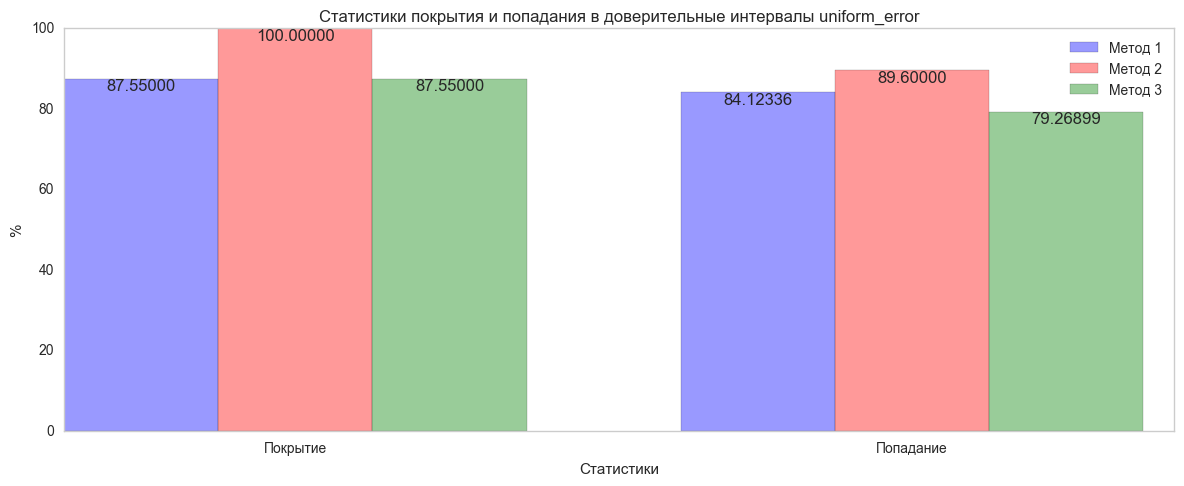

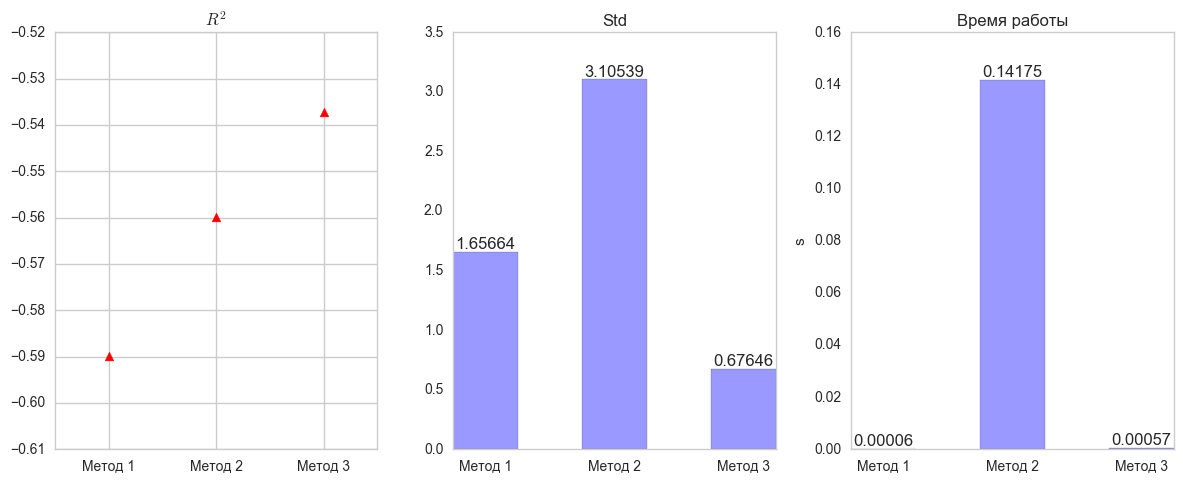

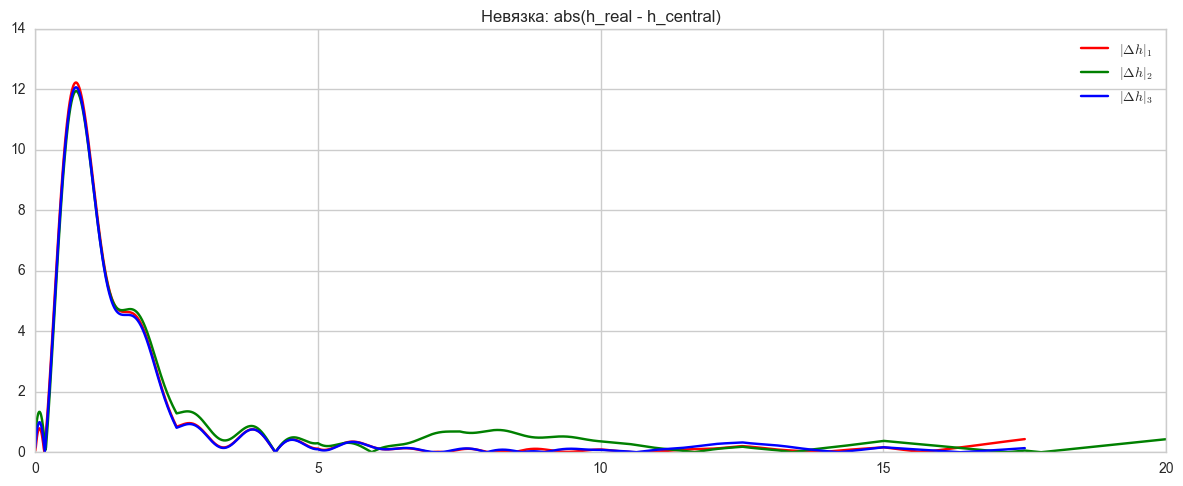

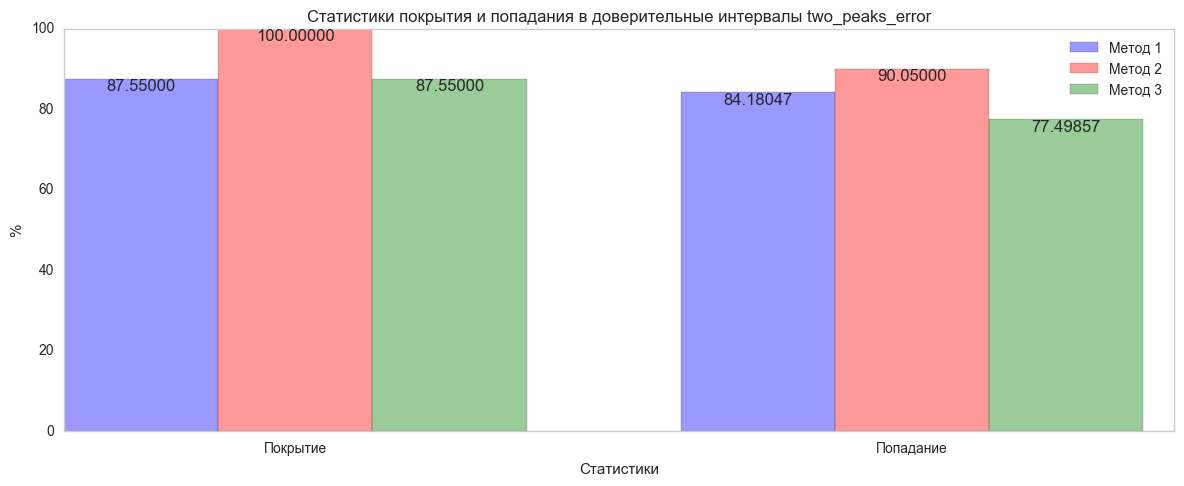

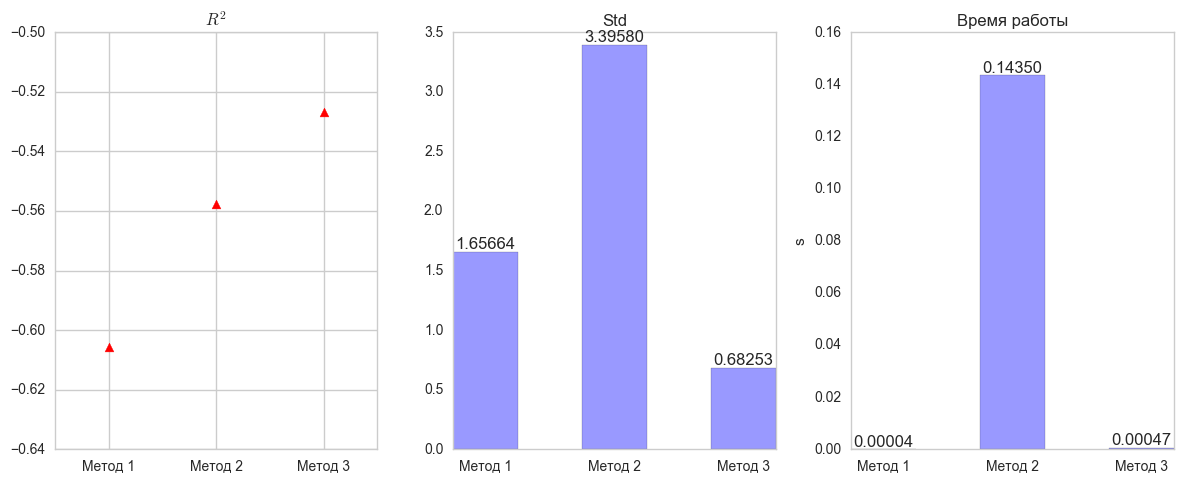

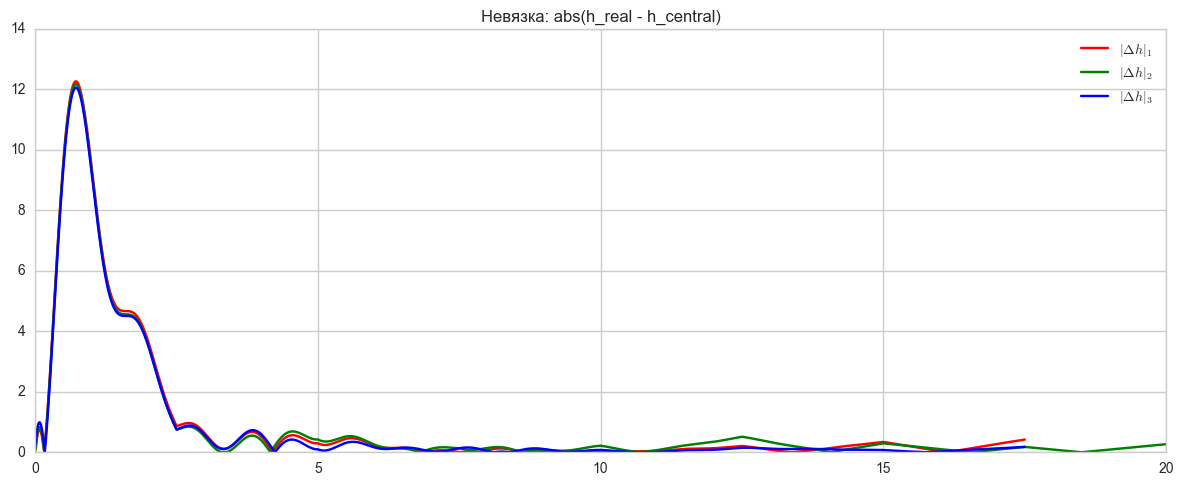

In [4]:
for error in errors:
    method_analyzer(20, 2.5, error)

#### Выводы

Как наглядно видно из рисунков, при слабом дроблении преимущество имеет второй метод, ибо работает точнее всего. Наблюдается это из статистики попадания в доверительный интервал. Казалось бы, можно использовать и статистику $R^2$, но она отрицательна для всех методов при таком большом шаге дискретизации, следовательно, аппроксимация центрами интервалов не очень консистентна.
И даже учитывая то, что он работает раз в 500 дольше третьего метода, его время работы достаточно мало при $\delta=2.5$. Хотя с другой стороны, второй метод генерирует достаточно большие доверительные интервалы, что следует из наибольшей статистики STD.

### Сравнение при среднем дроблении

Сравним методы в случае среднего дробления, к примеру возьмем $\delta = 1.0$ при $T = 20$.

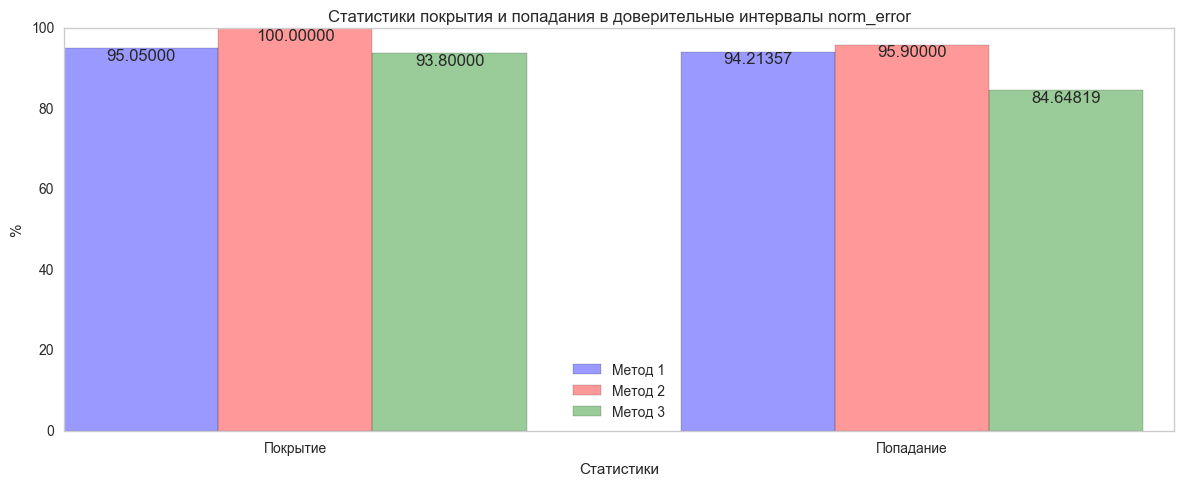

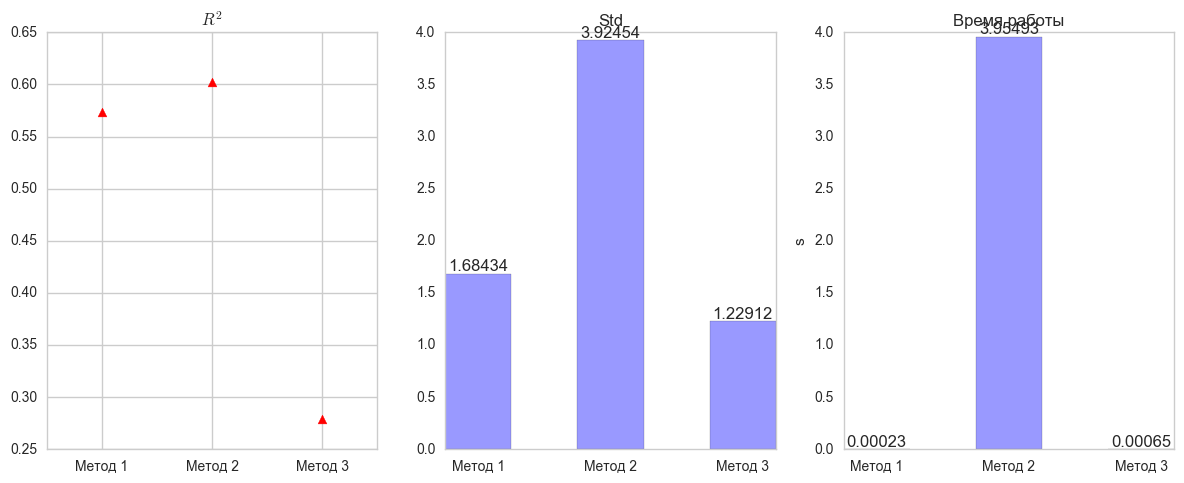

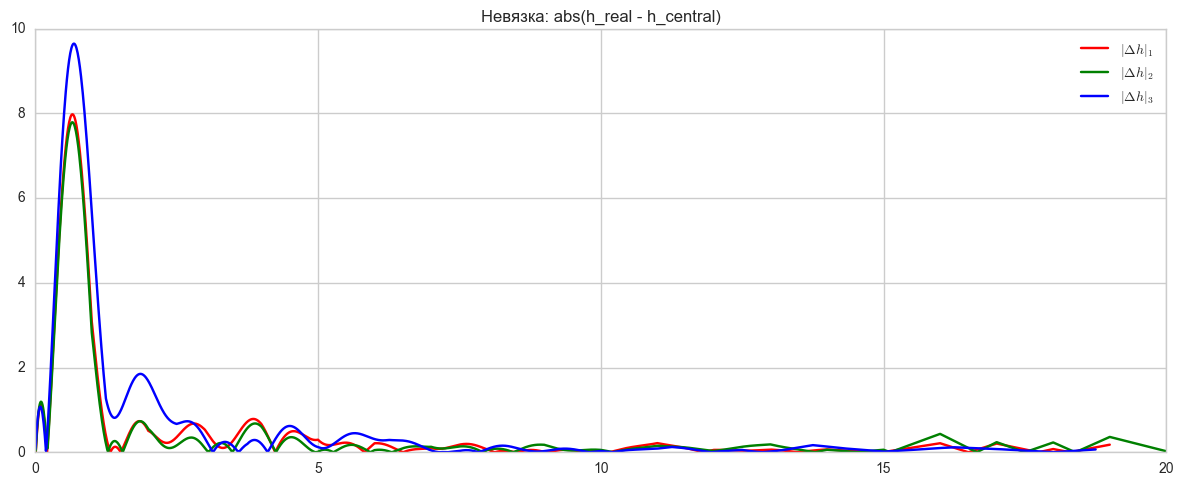

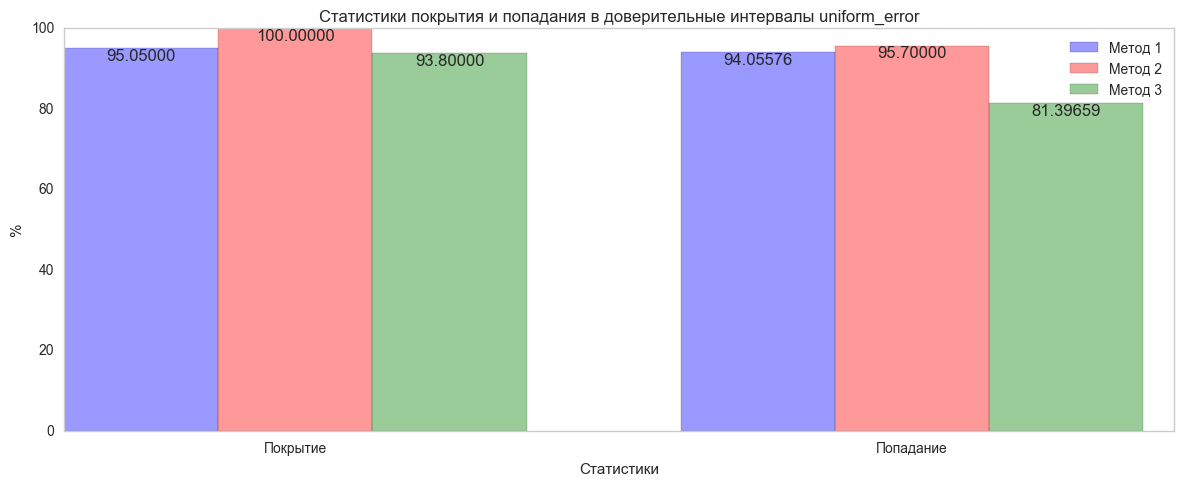

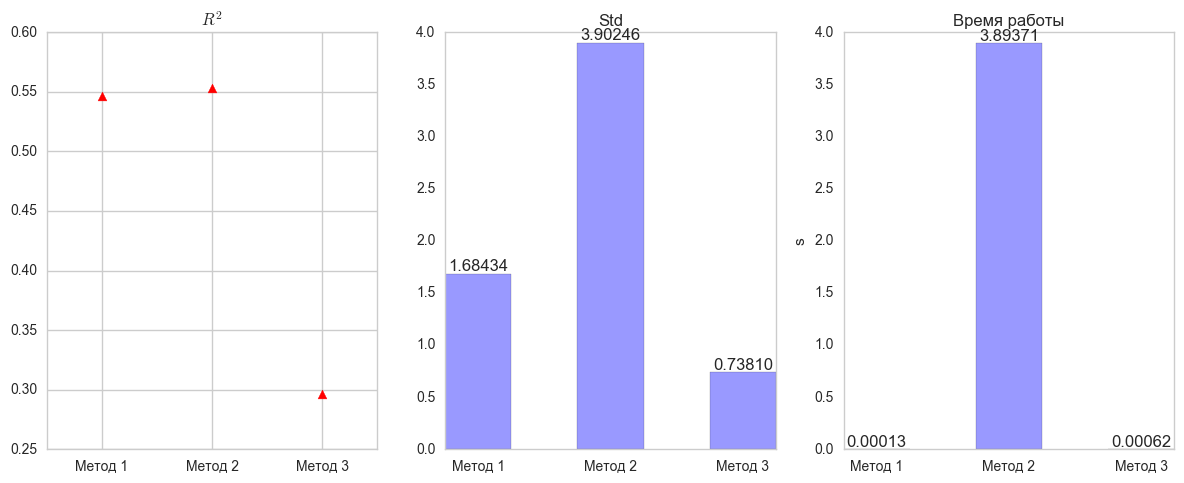

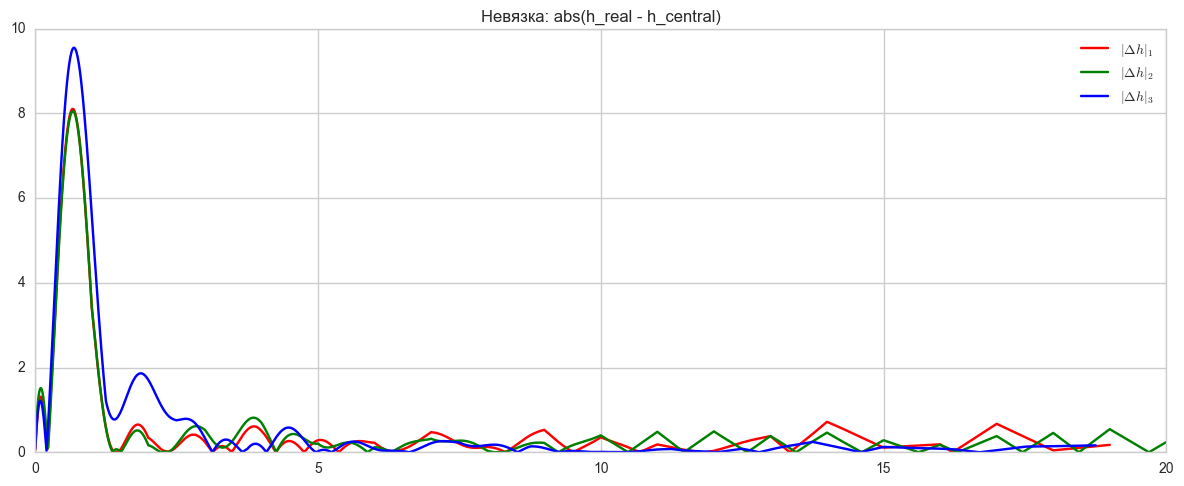

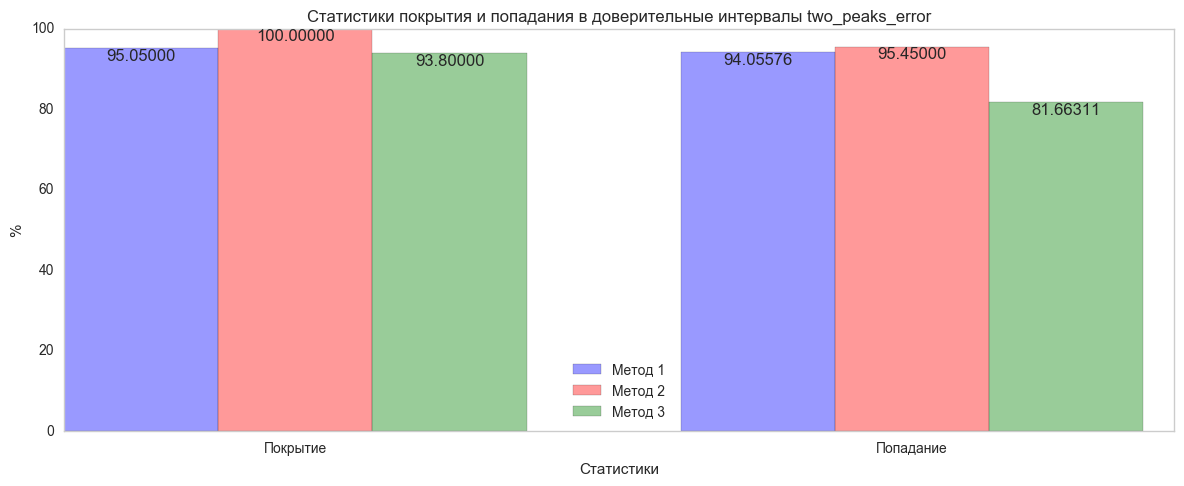

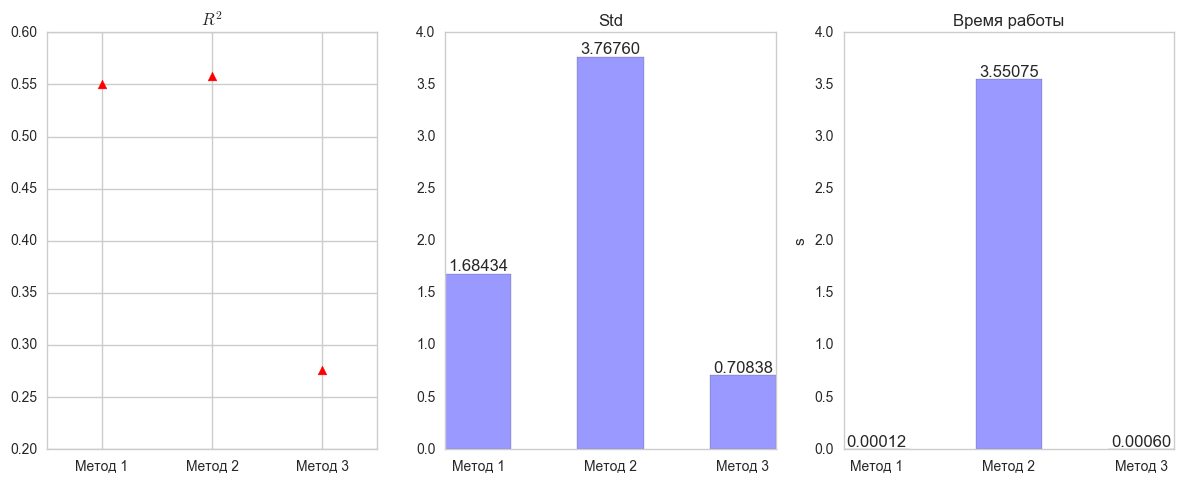

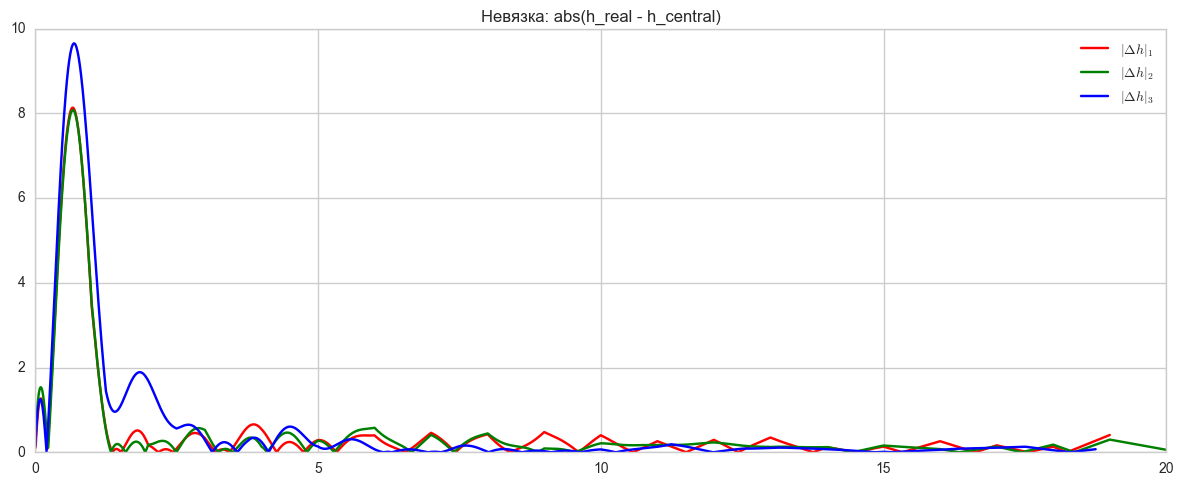

In [5]:
for error in errors:
    method_analyzer(20, 1.0, error)

#### Выводы

Как видно из рисунков, по качеству приближения по-прежнему лидирует второй метод, хотя время его работы экспоненциально растет. При таком $\delta=1.0$ первый метод догоняет по статистике $R^2$, а процент промахов доверительных интервалов у него больше, нежели у второго скорее всего из-за меньшего размера доверительных интервалов. Соответственно, первый метод более точный в плане разброса интервалов, на несколько порядков быстрее работает, и незначительно уступает в плане аппроксимации реального значения и процента попаданий в доверительный интервал. Таким образом, можно считать, что первый метод – фаворит при данном шаге дискретизации. Третий же метод, хоть и имеет меньшую ширину интервалов, уступает остальным методам по проценту попадания в доверительный интервал.

### Сравнение при сильном дроблении

Сравним методы в случае среднего дробления, к примеру возьмем $\delta = 0.1$ при $T = 20$. При этом время работы второго метода становится настолько велико, что смысла его включать в рассмотрение уже нету. К тому же, количество возможных комбинаций становится слишком много, поэтому приходится использовать рандомизированный выбор подмножеств уравнений, следовательно, значительно теряется точность.

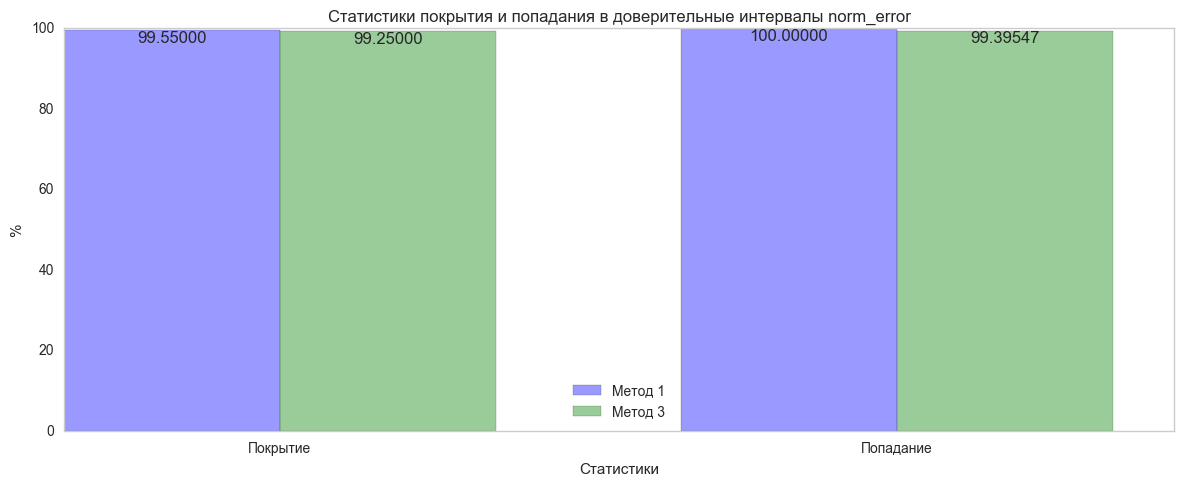

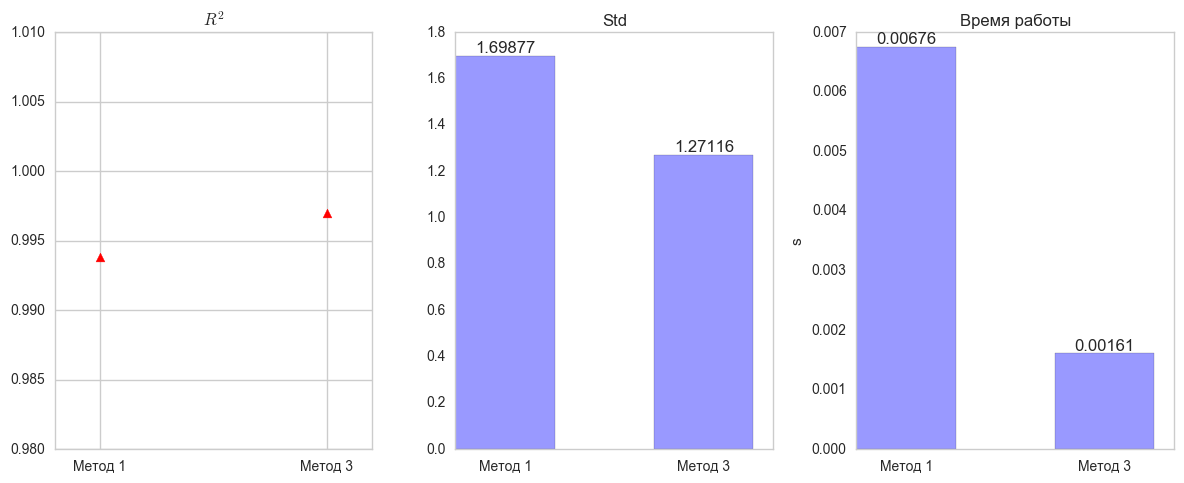

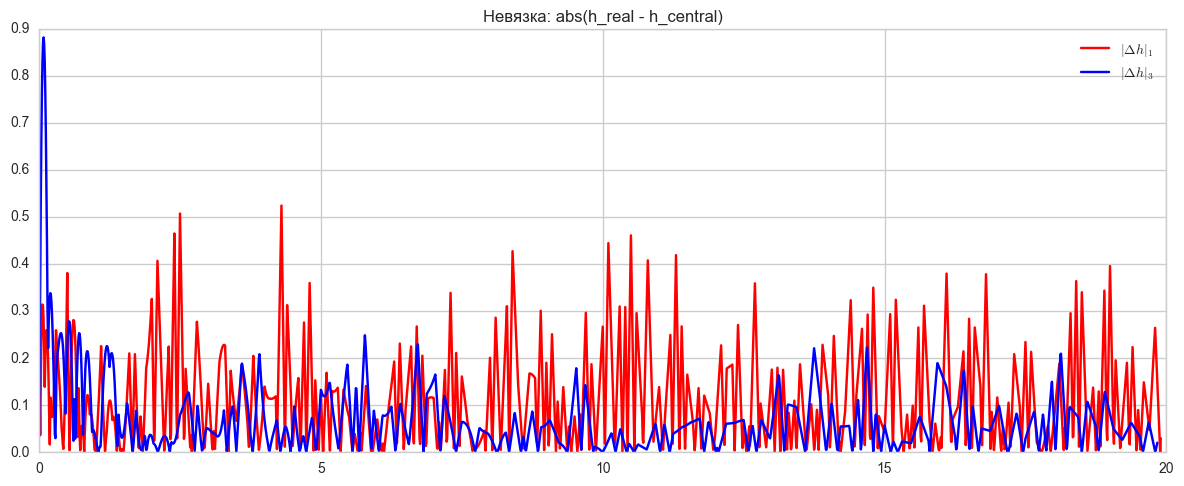

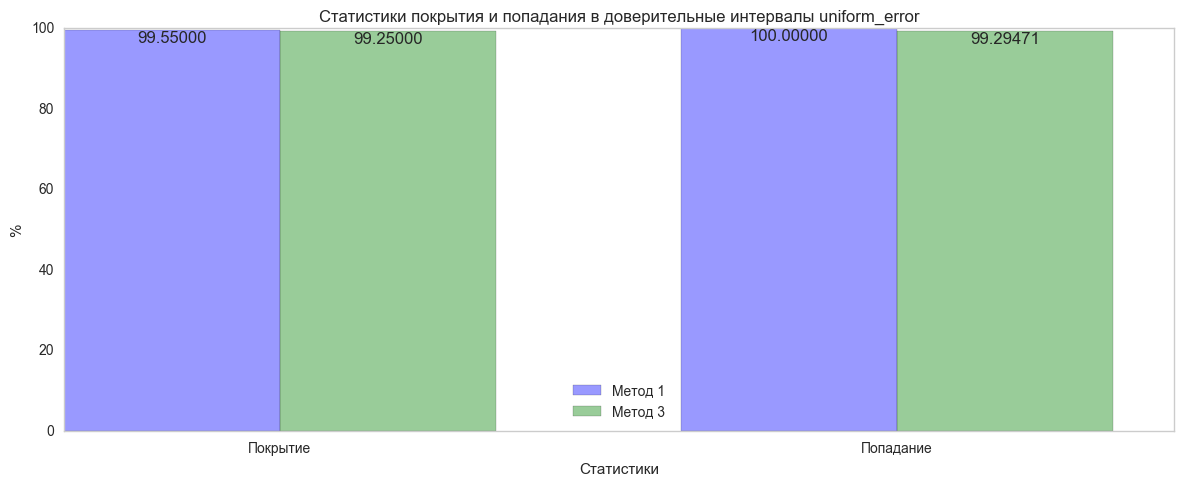

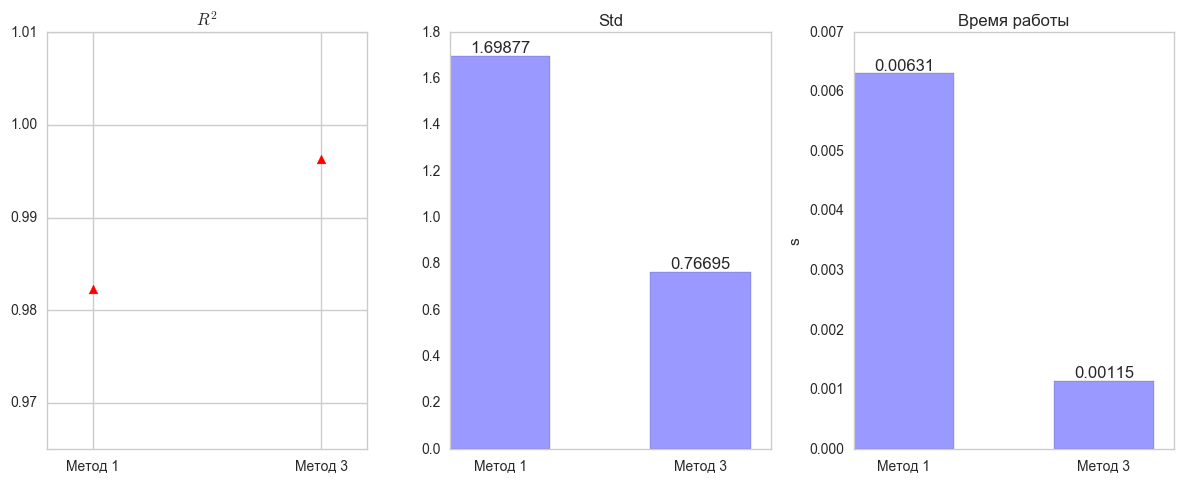

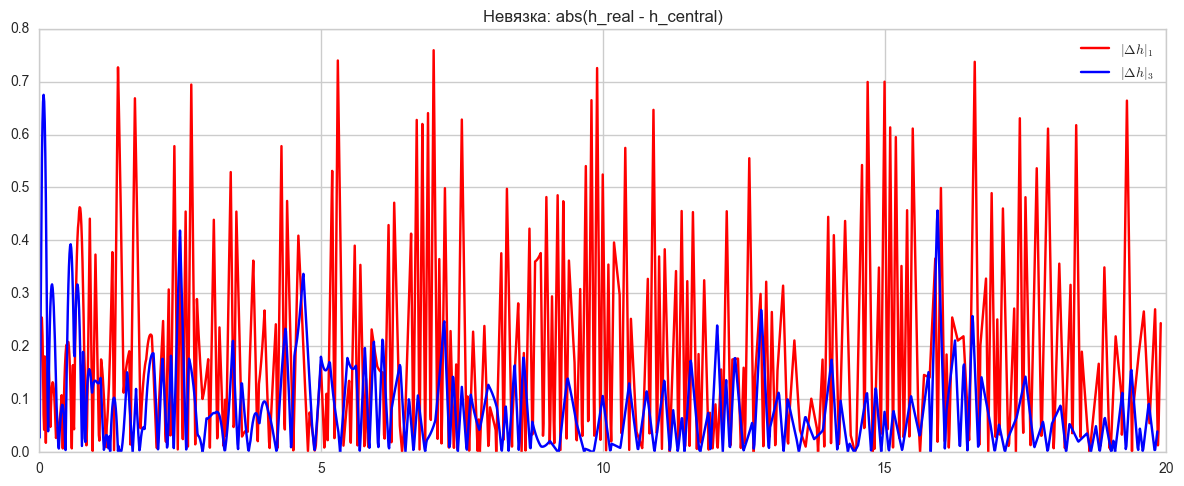

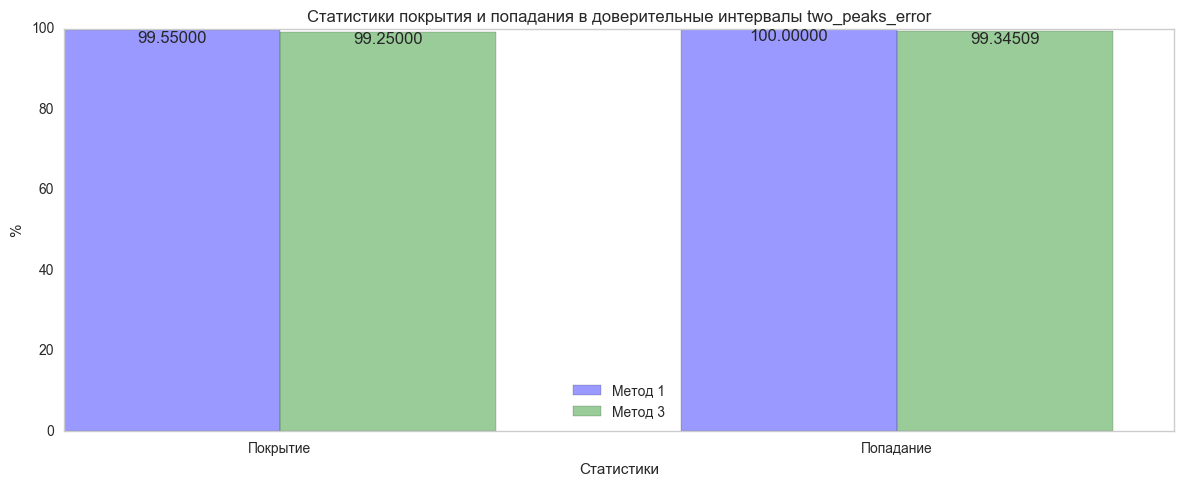

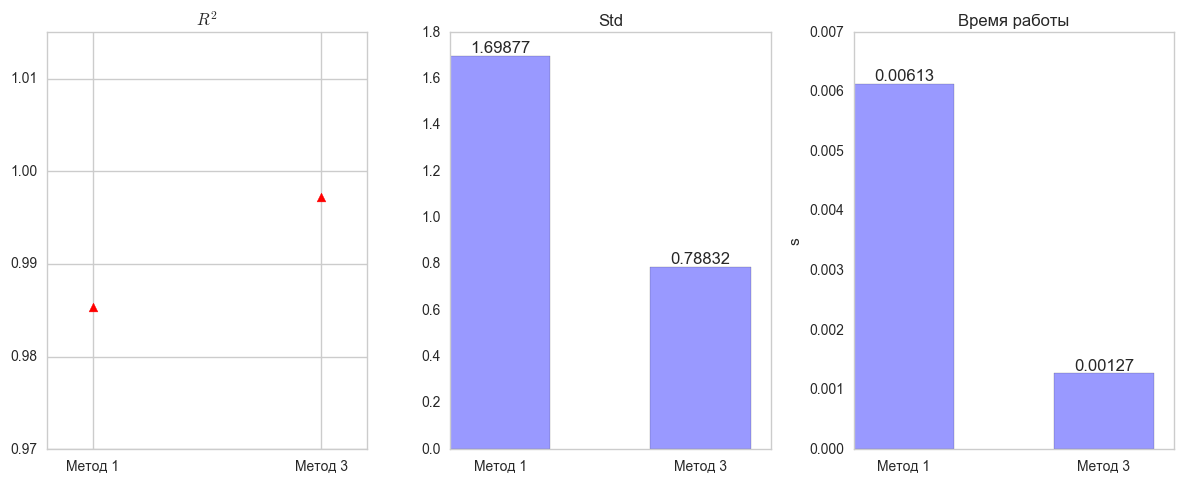

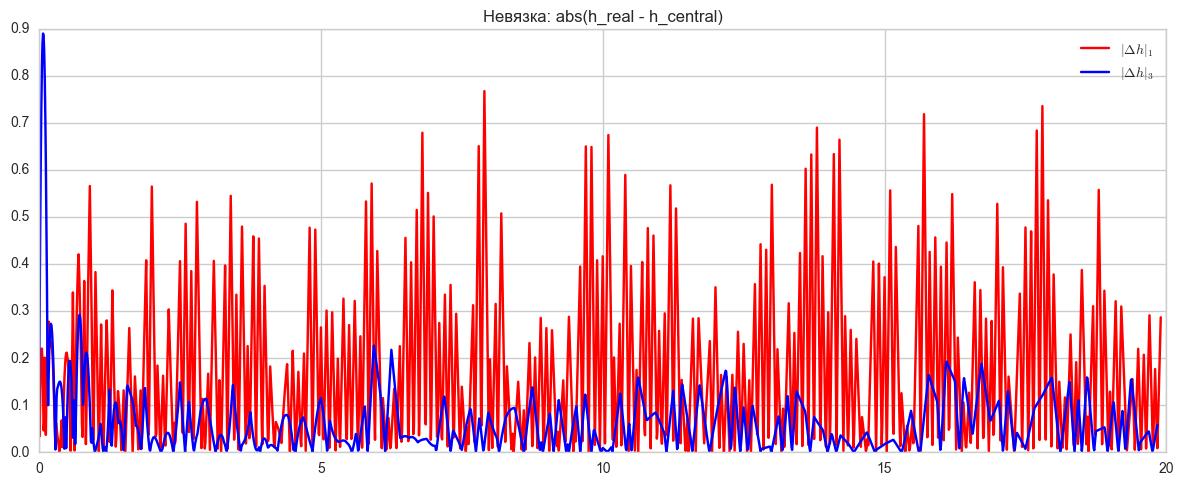

In [6]:
for error in errors:
    method_analyzer(20, 0.1, error, ignore_second=True)

#### Выводы

Как видно из рисунков, при сильном дроблении $\delta = 0.1$ общее преимущество имеет уже третий метод. Не смотря на то, что он незначительно уступает первому в проценте попаданий в доверительные интервалы, метод номер 3 более точно аппроксимирует исходный $h$ серединами интервалов (исходя из преимущества статистики $R^2$), быстрее работает и имеет меньшую ширину доверительных интервалов. По графикам невязки видно, что третий метод имеет скачок ближе к 0, в результате чего, вероятно, и получал вылет за доверительный интервал, но далее он приближает лучше, нежели метод номер 1.

## Общие выводы

Был проведен сравнительный анализ 3 методов восстановления параметров зашумленной системы, в результате которого была выведена следующая эмпирическая зависимость ($T$ – период затухания системы):
- если шаг дискретизации $\delta \approx T / 8$, то эффективнее всего справляется метод номер 2, то есть комбинаторный с гармоническим входным сигналом;
- если шаг дискретизации $\delta \approx T / 20$, то эффективнее всего справляется метод номер 1, то есть решение систем напрямую исходя из реакции на $u$ в виде аппроксимации $\delta$-функции Дирака;
- если шаг дискретизации $\delta \approx T / 200$, то эффективнее всего справляется метод номер 3, то есть эвристический метод на основе соображений из метода Тихонова, со ступенчатым входным сигналом.